In [14]:
"""A machine learning project using the Coulomb Matricies of molecules to predict the ground state energy
using artificial neural network by Keras."""


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [27]:
# Data available at 'https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule'

data_df = pd.read_csv('roboBohr.csv', index_col=0)

data_df.describe()


,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,13.464842,...,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,33107.484300,-11.178969
std,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,3.140732,...,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,23456.785147,3.659133
min,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-23.245373
25%,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,12.489127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12298.250000,-13.475805
50%,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,13.648992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27731.500000,-10.835211
75%,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,13.801184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55020.750000,-8.623903
max,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,60.365756,...,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,74980.000000,-0.789513


In [24]:
y_all = data_df['Eat'].to_numpy()



(16242,)

In [25]:
X_all = data_df.drop(columns=['pubchem_id', 'Eat']).to_numpy()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [47]:
X_train[0]

array([73.51669472, 18.64892819, 15.20533057, ...,  0.        ,
        0.        ,  0.        ])

In [104]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=1275),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [105]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping_cb])


Epoch 1/200
650/650 [==============================] - 2s 3ms/step - loss: 4.5754 - val_loss: 0.7227
Epoch 2/200
650/650 [==============================] - 2s 3ms/step - loss: 0.5570 - val_loss: 0.5221
Epoch 3/200
650/650 [==============================] - 2s 3ms/step - loss: 0.4820 - val_loss: 0.3388
Epoch 4/200
650/650 [==============================] - 2s 3ms/step - loss: 0.4023 - val_loss: 0.4960
Epoch 5/200
650/650 [==============================] - 2s 3ms/step - loss: 0.3132 - val_loss: 0.5819
Epoch 6/200
650/650 [==============================] - 2s 3ms/step - loss: 0.2504 - val_loss: 0.1697
Epoch 7/200
650/650 [==============================] - 2s 3ms/step - loss: 0.3536 - val_loss: 0.6366
Epoch 8/200
650/650 [==============================] - 2s 3ms/step - loss: 0.2928 - val_loss: 0.2797
Epoch 9/200
650/650 [==============================] - 2s 3ms/step - loss: 0.2071 - val_loss: 0.1462
Epoch 10/200
650/650 [==============================] - 2s 3ms/step - loss: 0.2974 - val_lo

In [106]:
model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 1ms/step - loss: 0.1659


0.16594412922859192

In [107]:
y_pred = model.predict(X_test)

print(y_pred)

102/102 [==============================] - 0s 1ms/step
[[-11.993064]
 [-14.498257]
 [-15.289317]
 ...
 [-10.047283]
 [ -9.653247]
 [ -8.453753]]


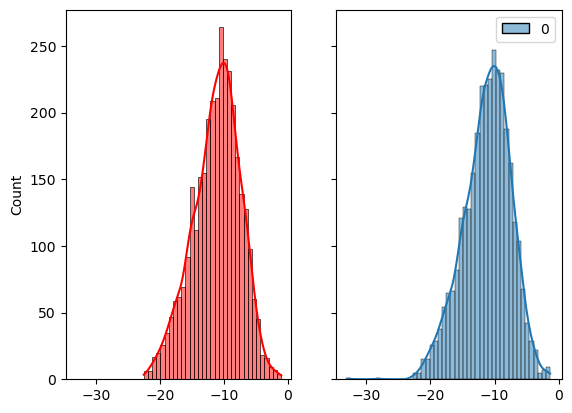

In [108]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
sns.histplot(y_test, kde=True, color='r', ax=axs[0])
sns.histplot(y_pred, kde=True, color='b', ax=axs[1])



plt.show()